# Tutorial de Big Data (UNT) 2024
## Tutorial 2

- Conocer qué son y cómo trabajar con APIs

¿Qué es una API? Los sistemas tienen distintos tipos de interfaces que permiten interactuar con ellos.

* **GUI (Graphical User Interface o interfaz gráfica)**: El usuario clickea e interactúa con distintos objetos para ejecutar acciones y lograr sus objetivos. Las páginas web tienen interfaces gráficas.
* **API (Application Programming Interface o interfaz de programación)**: El usuario escribe líneas de código para interactuar con el sistema, ejecutar acciones y lograr sus objetivos.

Todos los sitios web tienen una interfaz gráfica con la que estamos acostumbrados a interactuar, y también tienen una interfaz de programación más o menos desarrollada, o más o menos expuesta, con la cual tal vez no estemos tan acostumbrados a interactuar.

Ejemplo: 

En https://www.mercadolibre.com.ar/ podemos buscar en el buscador "pelotas", apretar "Enter" y el sistema devuelve el resultado de una búsqueda. Si, en cambio, ponemos por "pelotas futbol" y apretamos "Enter" de nuevo, cambiará el resultado de la búsqueda. Esta es la **interfaz gráfica del sitio**.

Sin embargo, también podríamos lograr el mismo objetivo sólo escribiendo distintas URLs en el navegador:

* https://listado.mercadolibre.com.ar/pelotas
* https://listado.mercadolibre.com.ar/pelotas-futbol

Esto es más parecido a lo que llamaríamos una **interfaz de programación**.


Las APIs son mecanismos que permiten que una aplicación o servicio acceda a un recurso en otra aplicación o servicio (un cliente accede a recurso en un servidor).

En la web, las interfaces de programación de uso más difundido son las APIs REST ([Representational state transfer](https://es.wikipedia.org/wiki/Transferencia_de_Estado_Representacional)). REST es un estilo para diseñar aplicaciones que especifica un conjunto de protocolos y métodos para interactuar con los recursos de internet escribiendo líneas de código.

Estas APIs se comunican mediante el protocolo HTTP para interactuar con los recursos (es el medio de comunicación comunicación entre el usuario y el servidor). HTTP es el mismo protocolo que se utiliza para cargar páginas web en un navegador.
Este protocolo indica cómo estructurar un mensaje de texto que describa la petición (**request**) del usuario o cliente a un servidor. Hay distintos tipos de peticiones que un usuario puede realizar, algunas de ellas son:

* **POST**: Envía datos al servidor para crear un recurso nuevo.
* **GET**: Se utiliza para obtener información de un recurso alojado en el servidor.
* **PUT**: Actualiza (crea o modifica) un recurso del servidor.
* **DELETE**: Elimina un recurso del servidor.

El cliente manda una petición (**request**) y el servidor devuelve una respuesta (**response**).

<font color="gray">
Fuente: Curso de Instituto Humai - APIs
<font>

Cada vez que vamos al navegador y escribimos la dirección de una página web, **estamos haciendo un GET request** a un servidor. Esto es una petición para adquirir el código de un recurso que queremos visualizar en el navegador.

La URL es la parte más importante de la definición de un GET request (aunque el navegador agrega otras cosas también, que no vemos) y nos permite cambiar la representación deseada de un mismo recurso de distintas maneras:

* https://deportes.mercadolibre.com.ar/pelotas-futbol pide al servidor pelotas de fútbol.
* https://deportes.mercadolibre.com.ar/pelotas-futbol_OrderId_PRICE pide al servidor pelotas de fútbol ordenadas por precio.

Cuando escribimos una URL en un navegador, la mayoría de las veces hacemos GET requests que devuelven código HTML (el código que da una estructura a una página web, tal como vimos en el video anterior cuando obteníamos el código HTML al hacer web scraping). Pero los GET requests pueden devolver datos en otros formatos (por ejemplo en JSON y en CSV).

Las APIs REST que definen GET requests capaces de devolver datos en formato JSON y CSV, son particularmente útiles cuando queremos analizar datos.

Ahora vamos a conocer algunas APIs.

### Vamos a usar la API de Mercado Libre

En particular, vamos a:
- ver los resultados de una búsqueda
- obtener la descripción de una publicación

Para ver más información ir a: https://developers.mercadolibre.com.ar/

In [2]:
import requests

#### Obtener ítems de una consulta de búsqueda

- https://developers.mercadolibre.com.ar/es_ar/items-y-busquedas

Con el parámetro “q” puedes realizar una búsqueda por palabra, frases o tributos claves de búsqueda. Es importante tener en cuenta que en este campo puedes enviar tantos detalles de los atributos de la publicación como sea necesario, de esta manera en la respuesta obtendrás búsquedas más precisas. Si quieres separar términos puedes usar %20 que corresponde al código ASCII.

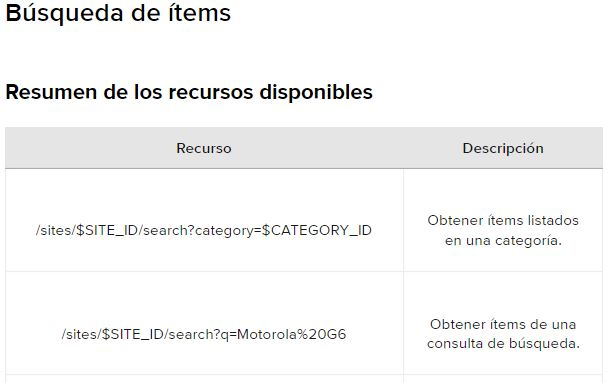


In [4]:
# Así se ve la búsqueda en el navegador: 
# https://listado.mercadolibre.com.ar/libro-introduction-to-statistical-learning
    
# Al usar la API tenemos que seguir este formato:
# https://api.mercadolibre.com/sites/$SITE_ID/search?q=nombre%20item

# Notar que:
# $SITE_ID: MLA  # MLA es el sitio de Argentina
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "libro introduction to statistical learning"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"libro introduction to statistical learning","paging":{"total":217,"primary_results":17,"offset":0,"limit":50},"results":[{"id":"MLA1418180779","title":"Libro: An Introduction To Statistical Learning: With In In","condition":"new","thumbnail_id":"978126-MLA76347336299_052024","catalog_product_id":null,"listing_type_id":"gold_special","sanitized_title":"libro-an-introduction-to-statistical-learning-with-in-in","permalink":"https://articulo.mercadolibre.com.ar/MLA-1418180779-libro-an-introduction-to-statistical-learning-with-in-in-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA412445","domain_id":"MLA-BOOKS","thumbnail":"http://http2.mlstatic.com/D_978126-MLA76347336299_052024-I.jpg","currency_id":"ARS","order_backend":1,"price":247999,"original_price":null,"sale_price":{"price_id":"","amount":247999,"conditions":{"eligible":true,"context_restrictions":[],"start_time":null,"end_time":null},"currency_id":

In [5]:
url

'https://api.mercadolibre.com/sites/MLA/search?q=libro%20introduction%20to%20statistical%20learning'

In [8]:
# Pero podríamos guardar el resultado en un diccionario (json)
data = response.json()
#type(data) # dict
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'libro introduction to statistical learning',
 'paging': {'total': 217, 'primary_results': 17, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1418180779',
   'title': 'Libro: An Introduction To Statistical Learning: With In In',
   'condition': 'new',
   'thumbnail_id': '978126-MLA76347336299_052024',
   'catalog_product_id': None,
   'listing_type_id': 'gold_special',
   'sanitized_title': 'libro-an-introduction-to-statistical-learning-with-in-in',
   'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1418180779-libro-an-introduction-to-statistical-learning-with-in-in-_JM',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA412445',
   'domain_id': 'MLA-BOOKS',
   'thumbnail': 'http://http2.mlstatic.com/D_978126-MLA76347336299_052024-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 247999,
   'original_price': None,
   'sale_price': {'price_id': '',
    'amount': 

In [23]:
# Ahora podemos acceder a los distintos resultados (usando las keys del diccionario), por ejemplo:

# Vemos la longitud de la lista de resultados
#print('Longitud de lista de resultados:', len(data['results']))

# Vemos el precio del primer resultado de la búsqueda
print('Precio del primer resultado:', data['results'][0]['price'])

# Link del primer resultado
print(data['results'][0]['permalink'])

Precio del primer resultado: 247999
https://articulo.mercadolibre.com.ar/MLA-1418180779-libro-an-introduction-to-statistical-learning-with-in-in-_JM


#### Consultar descripción de un ítem

- https://developers.mercadolibre.com.ar/en_us/item-description-2


In [24]:
# Al usar la API tenemos que seguir este formato:
#https://api.mercadolibre.com/items/$ITEM_ID/description

# Veamos un ejemplo con el primer item que aparece al buscar el libro
print(data['results'][0]['id'])
print(data['results'][0]['permalink'])
#https://articulo.mercadolibre.com.ar/MLA-1121313969-book-introduction-to-statistical-and-machine-learning-_JM#position=3&search_layout=stack&type=item&tracking_id=05f493fb-55d2-468b-896f-8a1890e10e65v
# Vemos que
# $ITEM_ID es MLA1418180779 # no se pone el guion medio

url = "https://api.mercadolibre.com/items/{}{}/description".format("MLA", '1418180779')
response2 = requests.get(url)
response2.text

MLA1418180779
https://articulo.mercadolibre.com.ar/MLA-1418180779-libro-an-introduction-to-statistical-learning-with-in-in-_JM


'{"text":"","plain_text":"Libro:  An Introduction to Statistical Learning: with in Python (Springer Texts in Statistics)  \\r\\n\\r\\nDescripción: \\r\\nIntroducción al aprendizaje estadístico proporciona una visión general accesible del campo del aprendizaje estadístico, un conjunto de herramientas esencial para dar sentido a los vastos y complejos conjuntos de datos que han surgido en campos que van desde la biología hasta las finanzas, el marketing y la astrofísica en los últimos veinte años. años. Este libro presenta algunas de las técnicas de modelado y predicción más importantes, junto con temas relevantes que incluyen regresión lineal, clasificación, métodos de remuestreo, métodos basados ??en árboles de contracción, máquinas de vectores de soporte, agrupación, aprendizaje profundo, análisis de supervivencia, pruebas múltiples y más. Se utilizan gráficos en color y ejemplos del mundo real para ilustrar los métodos presentados. Este libro está dirigido tanto a estadísticos como a

### API Series de Tiempo

La **[API Series de Tiempo de la Republica Argentina](https://apis.datos.gob.ar/series)** es una API REST desarrollada y mantenida por el Estado Nacional de Argentina para la consulta de estadísticas en formato de series de tiempo. Contiene series publicadas por organismos de la Administración Pública Nacional.

La API permite:

* [Buscar series](https://datosgobar.github.io/series-tiempo-ar-api/reference/search-reference/) por texto. También se pueden buscar en el sitio web de datos.gob.ar: https://datos.gob.ar/series
* Cambiar la frecuencia (por ejemplo: convertir series diarias en mensuales)
* Elegir la función de agregacion de valores, usada en el cambio de frecuencia (una serie se puede convertir de diaria a mensual promediando, sumando, sacando el maximo, el minimo, el ultimo valor del periodo, etc)
* Filtrar por rango de fechas
* Elegir el formato (CSV o JSON)
* Cambiar configuracion del CSV (caracter separador, caracter decimal)

En https://datos.gob.ar/series podés buscar series de tiempo publicadas por distintos organismos de la Administración Pública Nacional en Argentina y usar el link al CSV para leerlos directamente desde python con pandas.

También podes **buscar los ids de las series de interés** y juntarlos en la misma consulta para armar una tabla de hasta 40 series.

In [25]:
# Un ejemplo

url_arg = "https://apis.datos.gob.ar/series/api/series?ids=102.1_I2NG_ABRI_M_22,101.1_I2NG_2016_M_22&format=json"

response = requests.get(url_arg)
print(response)

datos = response.json()
datos

<Response [200]>


{'data': [['2016-04-01', 85.5254, 85.5254],
  ['2016-05-01', 89.1118, 89.1118],
  ['2016-06-01', 91.8528, 91.8528],
  ['2016-07-01', 93.7328, 93.7328],
  ['2016-08-01', 93.9221, 93.9221],
  ['2016-09-01', 95.0014, 95.0014],
  ['2016-10-01', 97.2428, 97.2428],
  ['2016-11-01', 98.8166, 98.8166],
  ['2016-12-01', 100.0, 100.0],
  ['2017-01-01', 101.313, 101.313],
  ['2017-02-01', 103.8085, 103.8085],
  ['2017-03-01', 106.2627, 106.2627],
  ['2017-04-01', 109.0613, 109.0613],
  ['2017-05-01', 110.4607, 110.4607],
  ['2017-06-01', 111.9943, 111.9943],
  ['2017-07-01', 113.9199, 113.9199],
  ['2017-08-01', 115.6031, 115.6031],
  ['2017-09-01', 117.9656, 117.9656],
  ['2017-10-01', 119.4985, 119.4985],
  ['2017-11-01', 120.8941, 120.8941],
  ['2017-12-01', 125.0392, 125.0392],
  ['2018-01-01', 127.0147, 127.0147],
  ['2018-02-01', 130.2913, 130.2913],
  ['2018-03-01', 133.5028, 133.5028],
  ['2018-04-01', 136.938, 136.938],
  ['2018-05-01', 139.58, 139.58],
  ['2018-06-01', 145.0582, 145.058